# Create Network of 2m temperature from ERA5


In [7]:
import numpy as np
from climnet.dataset import AnomalyDataset
import climnet.network.net as net
import climnet.network.clim_networkx as nx
from climnet.utils import time_utils
import climnet.plots as cplt
from importlib import reload

# Set parameters and paths
datapath = '../../data/t2m/2m_temperature_monthly_1979_2020.nc'
datapath = '/home/strnad/data/era5/2m_temperature/2m_temperature_sfc_1979_2020_mon_mean.nc'

### Regridding of data to an equidistant grid

In [6]:
ds = AnomalyDataset(data_nc=datapath,
                    var_name='t2m',
                    grid_step=10,
                    grid_type='fekete', 
                    detrend=True, 
                    climatology="dayofyear")


['time', 'longitude', 'latitude']
Rename:longitude : lon 
['time', 'lon', 'latitude']
['time', 'lon', 'latitude']
Rename:latitude : lat 
['time', 'lon', 'lat']
Shift longitude!
Start create grid fekete...

Create Fekete grid with 367 points with 1000 iterations.
Initial configuration not provided. Generating random one ...


Estim 54%|████████████████▏             | 538/1000 [00:07<00:06, 73.02it/s] 

convergence reached after 538 iterations!
... Finished
Cut grid in range lat: [array(-90.), array(90.)] and lon: [array(-180.), array(179.75)]
transpose data!



Intpo100%|██████████████████████████████| 492/492 [02:56<00:00,  2.79it/s]


Detrending data...
... finished!
Compute anomalies for variable t2m.
Created dayofyearly anomalies!


### Create a network from the created dataset

Here we create a network based on spearman correlations where we create the network only for correlation values with highest/lowest correlation such that the density of the network is 2%.

In [8]:
reload(net)
Net = net.CorrClimNet(ds, corr_method='spearman',
                  density=0.02)
Net.create()

(492, 367)
Created spearman correlation matrix of shape (367, 367)
Created spearman correlation matrix of shape (367, 367)
Minimum Correlation values: 0.38823656369239895
Created adjacency matrix.


We remove spurious links using link bundling. This may take a while. Therefore, we suggest to store the network after that.

In [12]:
adjacency_lb = Net.link_bundles(
    num_rand_permutations=2000,
)
Net.save('../../outputs/t2m_fekete_net_lb.npz')

Start computing null model of link bundles using None!
Save to folder: /home/strnad/climnet/monsoon/climnet/network/link_bundles/anomalies/!
Not running with SLURM job arrays, but with manual id:  0
Number of available CPUs: 16 for link bundeling!
Number of different number of links 41.


100%|██████████| 41/41 [00:00<00:00, 177.03it/s]

No number of links!No number of links!



Now compute new adjacency matrix!
Number of available CPUs: 16


  0%|          | 1/367 [00:00<01:18,  4.67it/s]

Node with index 1 has <2 links!
Node with index 10 has <2 links!
Node with index 14 has <2 links!
Node with index 16 has <2 links!
Node with index 41 has <2 links!
Node with index 56 has <2 links!Node with index 55 has <2 links!Node with index 64 has <2 links!


Node with index 67 has <2 links!Node with index 71 has <2 links!
Node with index 84 has <2 links!
Node with index 90 has <2 links!

Node with index 93 has <2 links!
Node with index 112 has <2 links!Node with index 98 has <2 links!

Node with index 128 has <2 links!Node with index 119 has <2 links!
Node with index 148 has <2 links!Node with index 141 has <2 links!Node with index 120 has <2 links!

Node with index 139 has <2 links!
Node with index 102 has <2 links!
Node with index 168 has <2 links!Node with index 161 has <2 links!Node with index 172 has <2 links!




100%|██████████| 367/367 [00:00<00:00, 1249.59it/s]


Node with index 159 has <2 links!
Node with index 171 has <2 links!
Node with index 181 has <2 links!
Node with index 175 has <2 links!

Node with index 183 has <2 links!
Node with index 194 has <2 links!
Node with index 202 has <2 links!Node with index 225 has <2 links!
Node with index 220 has <2 links!Node with index 248 has <2 links!

Node with index 234 has <2 links!
Node with index 257 has <2 links!

Node with index 290 has <2 links!Node with index 305 has <2 links!
Node with index 246 has <2 links!
Node with index 337 has <2 links!
Node with index 324 has <2 links!Node with index 317 has <2 links!Node with index 223 has <2 links!Node with index 267 has <2 links!


Node with index 334 has <2 links!
Node with index 355 has <2 links!Node with index 238 has <2 links!Node with index 259 has <2 links!Node with index 325 has <2 links!




Node with index 239 has <2 links!

Node with index 247 has <2 links!
Node with index 250 has <2 links!
Node with index 252 has <2 links!
Node with in

Network stored to ../../outputs/t2m_fekete_net_lb.npz!


Currently, we create a networkx object from the computed network to store computed properties

In [13]:
reload(nx)
cnx = nx.Clim_NetworkX(dataset=ds,
                    network=Net,
                    weighted=True)
print(f'Density of the network after removing spurious links: {cnx.get_sparsity()}')

# Compute node degree
cnx.compute_network_attrs('degree')
# save network as networkx file
cnx.save(savepath='../../outputs/t2m_network.graphml')

WARNING! Removed isolated nodes from network! Frac: 0.1526
Update Dataset as well and remove unconnected nodes
No isolated nodes anymore!


100%|██████████| 311/311 [00:00<00:00, 3358.01it/s]

Finished setting edge corr values!
DiGraph with 311 nodes and 2368 edges
Sparsity of adjacency:  0.024482790707292108
Node attributes: ['lon', 'lat']
Edge attributes: ['weight']
Sparsity of adjacency:  0.024482790707292108
Density of the network after removing spurious links: 0.024482790707292108
Compute degree, weighted=False!
Create ds for all attributes present in node 0.
ClimNetworkx File saved to ../../outputs/t2m_network.graphml!


### Plot node degree

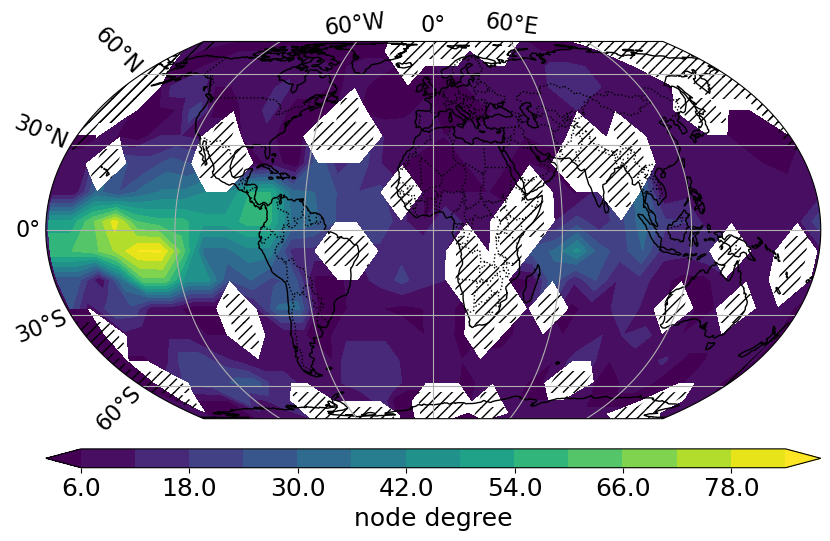

In [19]:
reload(cplt)
im = cplt.plot_map(cnx.ds,
                   cnx.ds_nx['degree'],
                   plot_type='contourf',
                   significant_mask=True,
                   projection='EqualEarth',
                   plt_grid=True,
                   levels=14,
                   tick_step=2,
                   round_dec=3,
                   label='node degree')


In [18]:
cnx.ds.mask

<xarray.DataArray 'mask' (points: 367)>
array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
    time     datetime64[ns] 1979-01-01
  * points   (points) int64 0 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365 366
    lon      (points) float64 -32.23 84.9 13.74 24.49 ... -73.66 -122.4 -146.5
    lat      (points) float64 19.43 -58.8 -33.18 -1.805 ... -50.19 12.7 -69.81

)